**Project Title: Brain Tumor MRI Image** **Classification**

Github link: https://github.com/Liharika03/Labmentix


**Steps to run:**

-download the files from code file and place them into a folder

-from the folder path open terminal

-to run the project in terminal type **streamlit run app.py**

**Problem Statement**

Brain tumors are among the most life-threatening diseases and require timely and accurate diagnosis for effective treatment. Manual analysis of brain MRI scans is time-consuming and can be prone to diagnostic inconsistencies due to the complexity of the tumor structure. This project addresses the challenge by leveraging deep learning techniques to classify brain MRI images into specific categories such as glioma, meningioma, pituitary tumor, and no tumor. The project also tackles issues like class imbalance, limited data, and model overfitting, and provides a user-friendly deployment interface to make AI-based predictions accessible in real-time clinical scenarios.



**Project Objective**

The objective of this project is to develop an intelligent deep learning system capable of automatically classifying brain MRI images into multiple tumor types. The system aims to assist medical professionals by enhancing diagnostic accuracy and speed, reducing human error, and improving early detection of brain tumors. The solution includes both custom-built CNN models and transfer learning approaches, and it is deployed via an interactive Streamlit web application for real-time use.

**Import Required Libraries Dataset Loading, Preprocessing**

We import essential libraries such as TensorFlow, Keras, NumPy, and Matplotlib. These will be used for model creation, training, and evaluation.

We use ImageDataGenerator to load images from the dataset folders and apply preprocessing steps like resizing, normalization, and augmentation to improve model performance.



In [3]:
#Install & Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [4]:
#Upload the ZIP File
from google.colab import files
uploaded = files.upload()

Saving Tumour-20250719T093356Z-1-001.zip to Tumour-20250719T093356Z-1-001.zip


In [5]:
import zipfile


# ✅ Correct file name (must include `.zip` extension)
zip_path = "Tumour-20250719T093356Z-1-001.zip"

# ✅ Target extraction folder (can be anything)
extract_path = "/content/Brain_Tumor_Dataset"

# Extract the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted to:", extract_path)



✅ Dataset extracted to: /content/Brain_Tumor_Dataset


In [6]:
#Check Folder Structure
print("Contents:")
print(os.listdir(extract_path))


Contents:
['Tumour']


In [7]:
#Set Paths for Model
base_dir = "/content/Brain_Tumor_Dataset/Tumour"
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir  = os.path.join(base_dir, "test")


In [8]:
#Preprocess Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   horizontal_flip=True)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical')

valid_generator = val_test_datagen.flow_from_directory(valid_dir,
                                                       target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                       batch_size=BATCH_SIZE,
                                                       class_mode='categorical')

test_generator = val_test_datagen.flow_from_directory(test_dir,
                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                      batch_size=1,
                                                      class_mode='categorical',
                                                      shuffle=False)


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


**Build Custom CNN Model**

Here we define a simple CNN architecture using Keras Sequential API. It includes Conv2D, MaxPooling2D, Dropout, and Dense layers to extract features and perform classification.

**Train the CNN Model**

We train the CNN model using the training and validation datasets. Training history is stored for later analysis.


In [9]:
#Build CNN
cnn_model = models.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Train CNN
history_cnn = cnn_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 205s 4s/step - accuracy: 0.3651 - loss: 1.4844 - val_accuracy: 0.5199 - val_loss: 1.1008
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.5592 - loss: 1.0372 - val_accuracy: 0.5418 - val_loss: 0.9882
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.6396 - loss: 0.9357 - val_accuracy: 0.7012 - val_loss: 0.8170
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.6629 - loss: 0.8510 - val_accuracy: 0.7311 - val_loss: 0.7338
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.7126 - loss: 0.7723 - val_accuracy: 0.6135 - val_loss: 0.9951
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.7329 - loss: 0.7126 - val_accuracy: 0.7829 - val_loss: 0.6198
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.7173 - loss: 0.7391 - val_accuracy: 0.7390 - val_loss: 0.6882
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.7266 - loss: 0.7138 - val_accuracy: 0.6793 - v

**Build and Train Transfer Learning Model**

We use MobileNetV2 as the base model for transfer learning. Custom layers are added on top and the model is trained on the MRI dataset.

In [11]:
#Transfer Learning (MobileNetV2)
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

img_size = (224, 224)
base_model = MobileNetV2(input_shape=(*img_size, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model_tl = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')
])

model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_tl.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [12]:
print(train_generator)
print(valid_generator)


In [13]:
history_tl = model_tl.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10
)


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.6217 - loss: 0.9337 - val_accuracy: 0.8167 - val_loss: 0.5012
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.8519 - loss: 0.4012 - val_accuracy: 0.8466 - val_loss: 0.4337
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.8666 - loss: 0.3741 - val_accuracy: 0.8147 - val_loss: 0.4890
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8894 - loss: 0.2990 - val_accuracy: 0.8008 - val_loss: 0.5622
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9120 - loss: 0.2613 - val_accuracy: 0.8566 - val_loss: 0.4346
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9031 - loss: 0.2580 - val_accuracy: 0.8506 - val_loss: 0.4376
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8960 - loss: 0.2565 - val_accuracy: 0.8347 - val_loss: 0.4526
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9347 - loss: 0.1800 - val_accuracy: 0.8546 - v

**Evaluate Custom CNN and Transfer Learning Model**

We evaluate the transfer learning model on the test dataset and compare its performance with the CNN model using evaluation metrics Accuracy, Precision, Recall, F1-Score, Confusion Matrix and plot them.

  1/246 ━━━━━━━━━━━━━━━━━━━━ 33s 136ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


246/246 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step
CNN Model Classification Report:
              precision    recall  f1-score   support

      glioma       0.85      0.50      0.63        80
  meningioma       0.80      0.32      0.45        63
    no_tumor       0.37      0.96      0.53        49
   pituitary       0.72      0.63      0.67        54

    accuracy                           0.57       246
   macro avg       0.69      0.60      0.57       246
weighted avg       0.71      0.57      0.58       246

Transfer Learning Model Classification Report:
              precision    recall  f1-score   support

      glioma       0.84      0.91      0.87        80
  meningioma       0.86      0.59      0.70        63
    no_tumor       0.97      0.73      0.84        49
   pituitary       0.68      1.00      0.81        54

    accuracy                           0.81       246
   macro avg       0.84      0.81      0.81       246
weighted avg       0

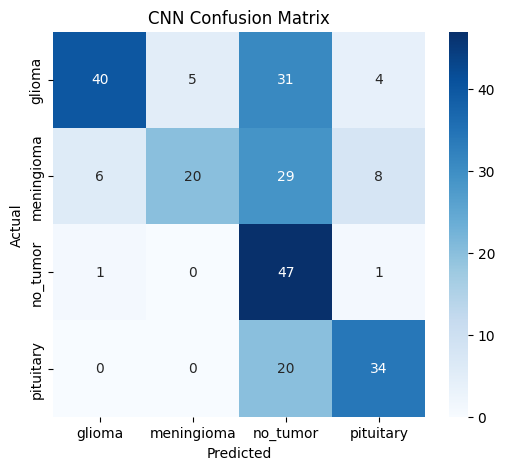

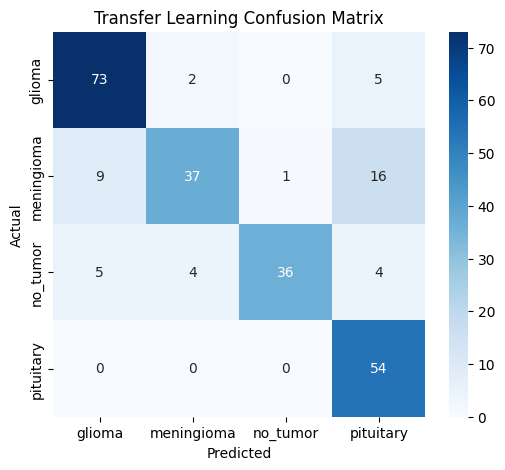

In [14]:
#Evaluation Code: Accuracy, Precision, Recall, F1-Score, Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ground-truth labels
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# CNN predictions
y_pred_cnn = cnn_model.predict(test_generator)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

# Transfer Learning predictions
y_pred_tl = model_tl.predict(test_generator)
y_pred_tl_classes = np.argmax(y_pred_tl, axis=1)

# Classification report
print("CNN Model Classification Report:")
print(classification_report(y_true, y_pred_cnn_classes, target_names=class_labels))

print("Transfer Learning Model Classification Report:")
print(classification_report(y_true, y_pred_tl_classes, target_names=class_labels))

# Confusion matrix plot
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_conf_matrix(confusion_matrix(y_true, y_pred_cnn_classes), "CNN Confusion Matrix")
plot_conf_matrix(confusion_matrix(y_true, y_pred_tl_classes), "Transfer Learning Confusion Matrix")



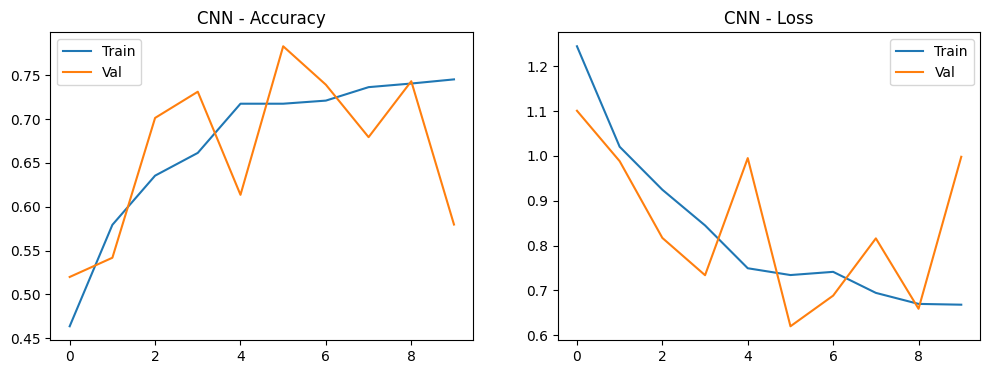

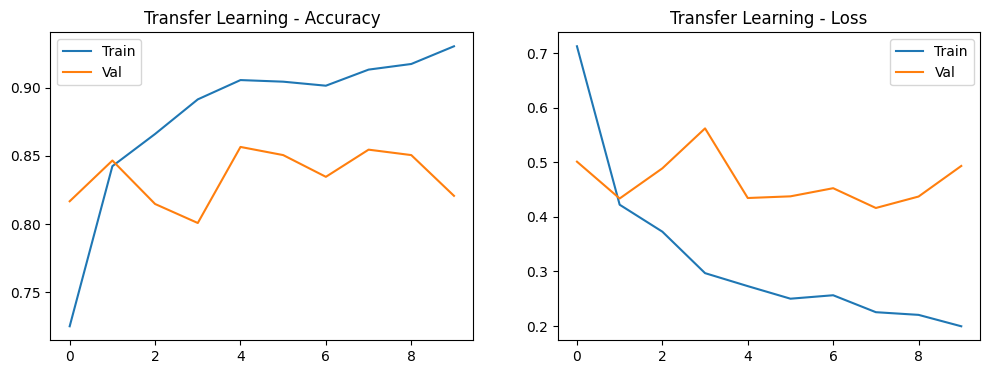

In [15]:
#Training History Visualization (Accuracy & Loss)
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{model_name} - Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{model_name} - Loss')
    plt.legend()

    plt.show()

plot_training_history(history_cnn, "CNN")
plot_training_history(history_tl, "Transfer Learning")


In [16]:
import warnings

In [19]:
cnn_model.save("cnn_model.h5")

In [20]:
model_tl.save("model_tl.h5")

In [21]:
from google.colab import files
files.download("cnn_model.h5")
files.download("model_tl.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 **Streamlit App Code**

This section contains the code to run a Streamlit web app that allows users to upload an MRI image and get predictions from the trained model.

In [1]:
%%writefile app.py
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np

st.title(" Brain Tumor Classifier")

uploaded_file = st.file_uploader("Upload an MRI image", type=["jpg", "jpeg", "png"])
if uploaded_file is not None:
    img = Image.open(uploaded_file)

    #  Reject suspicious images based on mode or size
    if img.mode not in ["L", "RGB"]:
        st.error(" This does not appear to be a valid grayscale or RGB MRI image.")
    elif img.size[0] < 200 or img.size[1] < 200:
        st.error(" Image is too small to be a valid brain MRI. Please upload a proper MRI scan.")
    else:
        #  Valid image → continue to preprocess, predict
        st.image(img, caption="Uploaded MRI Image", use_container_width=True)

        img = img.resize((224, 224))
        img_array = np.array(img) / 255.0
        img_array = img_array.reshape(1, 224, 224, 3)


         # Choose which model to load (you can switch between them)
        model = load_model("model_tl.h5")  # or "cnn_model.h5"
        pred = model.predict(img_array)
        class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']
        confidence = np.max(pred)
        label = class_names[np.argmax(pred)]

        if confidence < 0.85:
            st.warning(" This may not be a valid brain MRI scan. Please upload a clearer medical image.")
        else:
            st.success(f" Prediction: {label}")
            st.markdown(f"###  Confidence: **{confidence * 100:.2f}%**")


Writing app.py


In [23]:
from google.colab import files
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>